<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/01-intro/DataHandling_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please, fill in before you start:

# First Name: Платон

# Last Name: Рогожин

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [PlaZMaD](https://github.com/plazmad) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [1]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [10]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

data.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Task 2 (1 point)

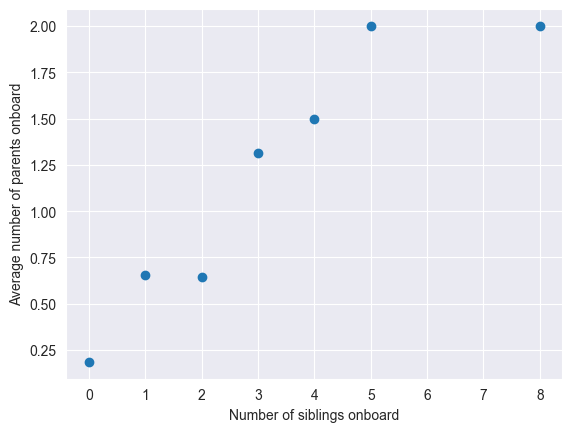

In [30]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt
# data.groupby('SibSp').Parch.mean()
# data.SibSp.unique()
# <YOUR CODE>
# plt.hist2d(data.SibSp, data.Parch, bins=20)
plt.scatter(sorted(data.SibSp.unique()), data.groupby('SibSp').Parch.mean())
plt.xlabel('Number of siblings onboard')
plt.ylabel('Average number of parents onboard')
plt.show()

## Task 3 (2 points)

In [109]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  features = dataset[["Fare", "Parch", "SibSp"]].copy()
  features["Fare"] /= features["Fare"].mean()

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    # <YOUR CODE>
    # E.g.
    n_neighbors=12
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.77


Сделано в допущении, что никакого глубинного смысла в решении быть не должно. Просто добавил фичу и потюнил количество соседей пока не выдало достаточное число.

¯\\___(ツ)___/¯

Если на максимальный балл требуется что-то посложнее, то было бы неплохо как-то дать об этом знать :)

## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

Test accuracy: 0.72


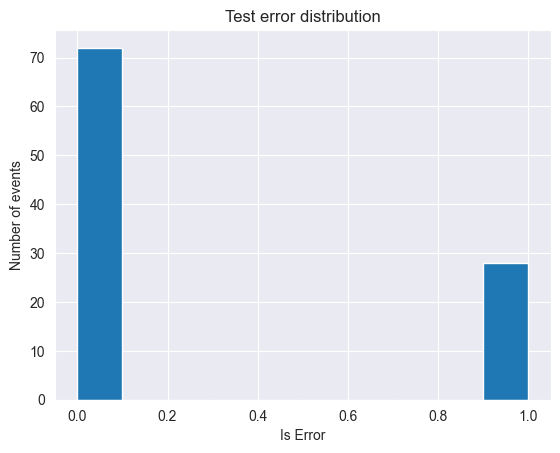

In [115]:
from sklearn.model_selection import train_test_split
data.shape
# <YOUR CODE>
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data.Survived, test_size=100, random_state=42)

model.fit(
    feature_selection_and_preprocessing(X_train),
    y_train
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(X_test)
)
print("Test accuracy:", accuracy_score(
    y_test,
    test_predictions
))

plt.hist(np.abs(y_test - test_predictions))
plt.xlabel('Is Error')
plt.ylabel('Number of events')
plt.title('Test error distribution')
plt.show()

Не совсем понял какую именно гистограмму надо было построить и нужно ли было подгонять здесь ошибку до 75. В задании не сказано, поэтому не стал.